In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline()

In [2]:
raw_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
raw_data.describe(include = "all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


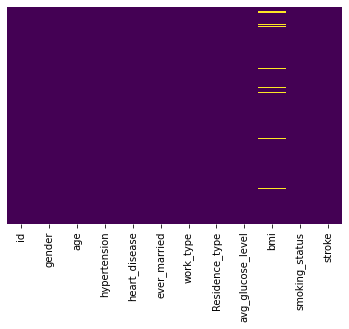

In [4]:
sns.heatmap(raw_data.isnull(),yticklabels = False ,cbar = False,cmap = 'viridis');

In [5]:
print(f"Percentage of missing value in BIM is  {(raw_data['bmi'].isnull().sum()/raw_data.shape[0])*100:0.2f}")

Percentage of missing value in BIM is  3.93


In [6]:
raw_data.dropna(axis = 0, inplace = True)
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
raw_data['stroke']=raw_data['stroke'].astype(str)
fig = px.scatter(raw_data,x='age',y='bmi',color = 'stroke')
fig.show()

In [8]:
fig = px.histogram(raw_data,x='age',color = 'stroke',marginal="box")
fig.show()

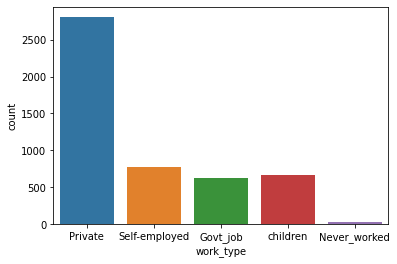

In [9]:
sns.countplot(x='work_type',data = raw_data);

In [10]:
raw_data['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [11]:
raw_data['gender'].replace(to_replace = 'Other',value ='Female',inplace = True)

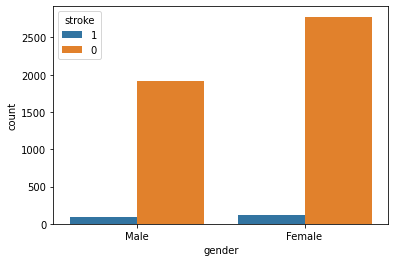

In [12]:
sns.countplot(x='gender',data = raw_data,hue = 'stroke');

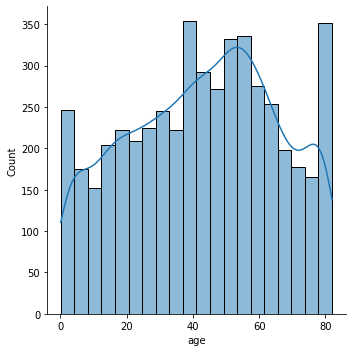

In [13]:
sns.displot(raw_data['age'],kde= True)
plt.show()

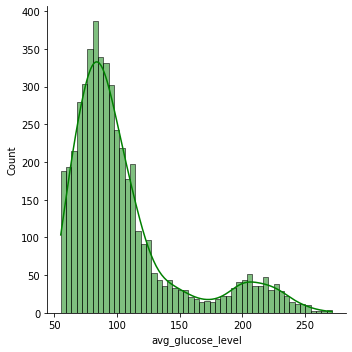

In [14]:
sns.displot(raw_data['avg_glucose_level'],kde= True,color = 'green')
plt.show()

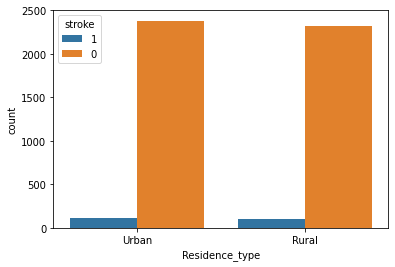

In [15]:
sns.countplot(x='Residence_type',data = raw_data,hue = 'stroke');

In [16]:
smoke_group = ['never smoked','Unknown','smokes','formerly smoked']
smoke_dict = {}

for i in smoke_group:
    
    per = (len(raw_data[raw_data["smoking_status"] == i])/len(raw_data))*100
    
    smoke_dict.update({i:round(per)})

print(smoke_dict)

{'never smoked': 38, 'Unknown': 30, 'smokes': 15, 'formerly smoked': 17}


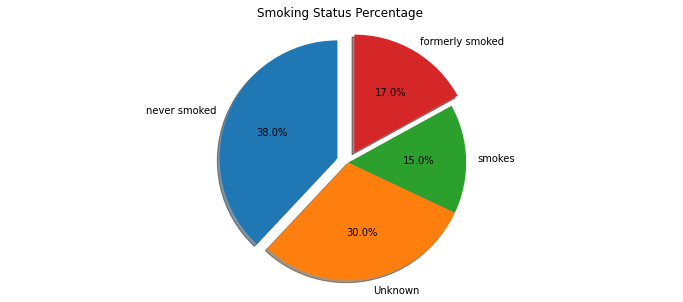

In [17]:
sizes = smoke_dict.values()

labels = smoke_dict.keys()

explode = (0.1, 0, 0, 0.1) 

fig1, ax = plt.subplots(figsize=(12,5))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Smoking Status Percentage ")
plt.show()

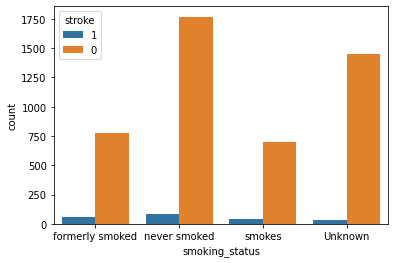

In [18]:
sns.countplot(x='smoking_status',data = raw_data,hue = 'stroke');

### The graph shows there is an inverse relationship between Smoking and Stroke

In [19]:
raw_data['bmi'].iplot(kind = 'hist')

In [20]:
raw_data['smoking_status'].value_counts()/raw_data['smoking_status'].value_counts().sum()
# unknown will replace with never smoked

never smoked       0.377266
Unknown            0.302098
formerly smoked    0.170503
smokes             0.150132
Name: smoking_status, dtype: float64

In [21]:
raw_data['work_type'].value_counts()/raw_data['work_type'].value_counts().sum()

Private          0.572622
Self-employed    0.157873
children         0.136688
Govt_job         0.128336
Never_worked     0.004482
Name: work_type, dtype: float64

# Converting categorical data to numerical

In [22]:
data = raw_data.copy()

data['gender']= data['gender'].map({'Female':1,"Male":0})
data['ever_married'] = data['ever_married'].map({'Yes':1,"No":0})
data['Residence_type'] = data['Residence_type'].map({'Urban':0,'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'never smoked':0,'Unknown':0,'smokes':1,'formerly smoked':2})
data['work_type'] = data['work_type'].map({'Private':1,'Self-employed':2,'children':3,'Govt_job':4,'Never_worked':5})

In [23]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,1,0,228.69,36.6,2,1
2,31112,0,80.0,0,1,1,1,1,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,1,0,171.23,34.4,1,1
4,1665,1,79.0,1,0,1,2,1,174.12,24.0,0,1
5,56669,0,81.0,0,0,1,1,0,186.21,29.0,2,1


In [24]:
y= data['stroke']
X = data.drop(columns = ['stroke','id'],axis = 1)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scale = scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.30,random_state = 42)

In [27]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

LogisticRegression()

In [28]:
predictions = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

In [30]:
import warnings
warnings.filterwarnings('ignore')

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473



In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test,predictions)

array([[1401,    0],
       [  72,    0]])

In [33]:
logmodel.score(X_test,y_test)

0.9511201629327902

In [34]:
sample = data[1500:1501]
sample

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1582,24218,1,78.0,0,0,0,1,1,87.7,29.6,0,0


In [35]:
sample.drop(columns = ['stroke','id'],inplace = True)
sample

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1582,1,78.0,0,0,0,1,1,87.7,29.6,0


In [36]:
sample_scale = scaler.fit_transform(sample)
y_hat = logmodel.predict(sample_scale)
y_hat

array(['0'], dtype=object)